In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as t

# Reading the log data

In [2]:
df = pd.read_csv('logs.csv')

In [60]:
df.head()

,Time,User full name,Event context,Component,Event name,Origin
0,"1/08/19, 11:23",Sushil shrestha,Course: COMP 341: Human Computer Interaction,Logs,Log report viewed,web
1,"1/08/19, 11:22",Sushil shrestha,Course: COMP 341: Human Computer Interaction,System,Course viewed,web
2,"1/08/19, 10:58",UDIP PARAJULI,"File: COMP 341 SYLLABUS ""syllabus""",File,Course module viewed,web
3,"1/08/19, 10:57",UDIP PARAJULI,Course: COMP 341: Human Computer Interaction,System,Course viewed,web
4,"1/08/19, 10:10",MALA DEEP UPADHAYA,"Forum: Reading ""assignment""",Forum,Course module viewed,web


## Total number of data(instances)

In [4]:
len(df)

54087

# Data preprocessing

Dropping Affected user, Description and IP address. Almost all entries of Affected user is Null, Description entry is redundant to Event name, IP address is of no use in our context. 

In [5]:
df = df.drop(['Affected user','Description', 'IP address'], axis = 1 )

In [6]:
df.head()

,Time,User full name,Event context,Component,Event name,Origin
0,"1/08/19, 11:23",Sushil shrestha,Course: COMP 341: Human Computer Interaction,Logs,Log report viewed,web
1,"1/08/19, 11:22",Sushil shrestha,Course: COMP 341: Human Computer Interaction,System,Course viewed,web
2,"1/08/19, 10:58",UDIP PARAJULI,"File: COMP 341 SYLLABUS ""syllabus""",File,Course module viewed,web
3,"1/08/19, 10:57",UDIP PARAJULI,Course: COMP 341: Human Computer Interaction,System,Course viewed,web
4,"1/08/19, 10:10",MALA DEEP UPADHAYA,"Forum: Reading ""assignment""",Forum,Course module viewed,web


## Finding unique users

In [7]:
user_names = df['User full name'].unique()

Total number of unique users

In [8]:
user_names = np.array(user_names, dtype = np.str)

In [9]:
user_names

array(['Sushil shrestha', 'UDIP PARAJULI', 'MALA DEEP UPADHAYA',
       'KUSUM RANJITKAR', 'SURAJ KUMAR SAH', 'AABHA PAUDEL',
       'SUBARNA SUBEDI', 'RUCHI TANDUKAR', 'NIRMAL BHANDARI',
       'SHARAD DUWAL', 'TOHFA NIRAULA', 'PRAKASH KHATRI', 'PRANIT DAHAL',
       'PRANISH SHRESTHA', 'SANJIV GAUTAM', 'ShaiLesh ??',
       'Pratik Rajbhandari', 'ARPAN MAHATRA', 'SUDIP MAHARJAN',
       'Subash Hada', 'BHUMI MALLA', 'Ekta Chaudhary', 'ROCHAK GAUTAM',
       'RISHABH SHRESTHA', 'BIKASH POKHAREL', 'ASHMITA PHUYAL',
       'Diyaswor Makai Shrestha', 'RABINA SHRESTHA', 'SACHIN MAHARJAN',
       'PRAGYA BHANDARI', 'BRAJESH RAJ KAYASTHA', 'MANISH BHUSAL',
       'CHANDRA RAI', 'AAYUSH MALLA', 'Anil Kumar Shrestha',
       'RAVI -B PRAJAPATI', 'ANISH POUDEL', 'SAURAV MASKEY',
       'SANDESH SUKUBHATTU', 'AAKRITI KHADKA', 'BISHESHWOR BHATTA',
       'PRASHANNA ADHIKARI', 'ANURODH YADAV', 'MURARI KUMAR GUPTA',
       'RAVI -A PRAJAPATI', 'ABHAY RAUT', 'SURESH THAPA',
       'AMIR MANANDHAR',

The Users of the moodle system not only includes the CE/CS student of 2016 batch but also CE/CS student of 2015 batch and some users from DLR labs. So, there are total of 231 users where 97 users are CE/CS students of 2016 batch and rest are other  users.

In [10]:
len(user_names)

231

Converting strings to lowercase

In [11]:
lower_user_names = np.char.lower(user_names)

In [12]:
lower_user_names

array(['sushil shrestha', 'udip parajuli', 'mala deep upadhaya',
       'kusum ranjitkar', 'suraj kumar sah', 'aabha paudel',
       'subarna subedi', 'ruchi tandukar', 'nirmal bhandari',
       'sharad duwal', 'tohfa niraula', 'prakash khatri', 'pranit dahal',
       'pranish shrestha', 'sanjiv gautam', 'shailesh ??',
       'pratik rajbhandari', 'arpan mahatra', 'sudip maharjan',
       'subash hada', 'bhumi malla', 'ekta chaudhary', 'rochak gautam',
       'rishabh shrestha', 'bikash pokharel', 'ashmita phuyal',
       'diyaswor makai shrestha', 'rabina shrestha', 'sachin maharjan',
       'pragya bhandari', 'brajesh raj kayastha', 'manish bhusal',
       'chandra rai', 'aayush malla', 'anil kumar shrestha',
       'ravi -b prajapati', 'anish poudel', 'saurav maskey',
       'sandesh sukubhattu', 'aakriti khadka', 'bisheshwor bhatta',
       'prashanna adhikari', 'anurodh yadav', 'murari kumar gupta',
       'ravi -a prajapati', 'abhay raut', 'suresh thapa',
       'amir manandhar',

As you can see ShaiLesh has '??' after name. so removing that

In [13]:
lower_user_names = np.where(lower_user_names == "shailesh ??","shailesh",lower_user_names)

## Finding total event count of each users

In [14]:
total_event_count = []
for i in user_names:
    count = df.loc[df['User full name'] == i]
    total_event_count.append(len(count))
    print(i, '::', len(count))

Sushil shrestha :: 3632
UDIP PARAJULI :: 410
MALA DEEP UPADHAYA :: 215
KUSUM RANJITKAR :: 282
SURAJ KUMAR SAH :: 468
AABHA PAUDEL :: 126
SUBARNA SUBEDI :: 126
RUCHI TANDUKAR :: 301
NIRMAL BHANDARI :: 318
SHARAD DUWAL :: 365
TOHFA NIRAULA :: 309
PRAKASH KHATRI :: 177
PRANIT DAHAL :: 162
PRANISH SHRESTHA :: 180
SANJIV GAUTAM :: 292
ShaiLesh ?? :: 393
Pratik Rajbhandari :: 597
ARPAN MAHATRA :: 3055
SUDIP MAHARJAN :: 296
Subash Hada :: 202
BHUMI MALLA :: 306
Ekta Chaudhary :: 278
ROCHAK GAUTAM :: 220
RISHABH SHRESTHA :: 212
BIKASH POKHAREL :: 230
ASHMITA PHUYAL :: 215
Diyaswor Makai Shrestha :: 278
RABINA SHRESTHA :: 442
SACHIN MAHARJAN :: 195
PRAGYA BHANDARI :: 161
BRAJESH RAJ KAYASTHA :: 255
MANISH BHUSAL :: 262
CHANDRA RAI :: 278
AAYUSH MALLA :: 275
Anil Kumar Shrestha :: 165
RAVI -B PRAJAPATI :: 210
ANISH POUDEL :: 434
SAURAV MASKEY :: 83
SANDESH SUKUBHATTU :: 560
AAKRITI KHADKA :: 274
BISHESHWOR BHATTA :: 940
PRASHANNA ADHIKARI :: 700
ANURODH YADAV :: 121
MURARI KUMAR GUPTA :: 214
RAV

In [15]:
total_event_count = np.array(total_event_count)

## Making a new dataframe with users and log count

In [16]:
data = {'User Name': lower_user_names, 'Total Event Count': total_event_count}

In [17]:
work_data = pd.DataFrame(data)

In [18]:
work_data.head()

,User Name,Total Event Count
0,sushil shrestha,3632
1,udip parajuli,410
2,mala deep upadhaya,215
3,kusum ranjitkar,282
4,suraj kumar sah,468


## Working on Internal marks data and trying to connect it with log data

In [19]:
student_data = pd.read_csv('tabula_ce_intmarks.csv')

In [20]:
student_data.head()

,Name,INT1(20),LQ(10),MCQ(10),Total(20),Best of Internal I and II (20),Assign (10),PAPER(10),PROJECT(10),TOTAL(50)
0,ADHIKARI SHAILESH,13.0,8.0,8.5,16.5,16.5,8.0,8.0,7.0,39.5
1,ARYAL YACHANA,11.0,8.0,10.0,18.0,18.0,9.0,8.0,7.0,42.0
2,BAGALE AKRITI,13.5,6.0,8.0,14.0,14.0,9.0,8.0,7.0,38.0
3,BASNET JUNTH,15.0,6.0,8.0,14.0,15.0,6.0,6.0,8.0,35.0
4,BHANDARI PRAGYA,14.0,8.0,9.5,17.5,17.5,9.0,7.0,8.0,41.5


Lowercasing the names

In [21]:
student_data['Name'] = student_data['Name'].str.lower()

In [22]:
student_data['Name']

0           adhikari shailesh
1               aryal yachana
2               bagale akriti
3                basnet junth
4             bhandari pragya
5           bhatta bisheshwor
6          bhattarai shantanu
7               bhusal manish
8                bohara bipin
9              chaudhary ekta
10         chaudhary pusendra
11            chaudhary sumit
12             dhakal kaushal
13              duwal avineak
14              gautam sanjiv
15             ghimire bigyan
16                 giri akash
17             jaiswal kishan
18        joshi bhanu  bhakta
19               karki jasmin
20             khadka aakriti
21             khatri prakash
22         lamichhane prajwol
23            maharjan sachin
24              mahatra arpan
25               malla aayush
26                malla bhumi
27          manandhar nirusha
28       neupane sudip prasad
29            parajuli anukul
30               paudel aabha
31          prajapati ravi -a
32          prajapati ravi -b
33        

## Coverting the name format to 'firstname' 'lastname' so that it can be compared to log usernames

In [23]:
student_data['Name'].iloc[1].split()

['aryal', 'yachana']

In [24]:
def swap(list, pos1, pos2):
    list[pos1], list[pos2] = list[pos2],list[pos1]
    return list

full_name = []

for i in range(0,56):
    name = student_data['Name'].iloc[i].split()
    name = swap(name, 0,1)
    name = " ".join(name)
    full_name.append(name)

full_name = np.array(full_name)

In [25]:
full_name

array(['shailesh adhikari', 'yachana aryal', 'akriti bagale',
       'junth basnet', 'pragya bhandari', 'bisheshwor bhatta',
       'shantanu bhattarai', 'manish bhusal', 'bipin bohara',
       'ekta chaudhary', 'pusendra chaudhary', 'sumit chaudhary',
       'kaushal dhakal', 'avineak duwal', 'sanjiv gautam',
       'bigyan ghimire', 'akash giri', 'kishan jaiswal',
       'bhanu joshi bhakta', 'jasmin karki', 'aakriti khadka',
       'prakash khatri', 'prajwol lamichhane', 'sachin maharjan',
       'arpan mahatra', 'aayush malla', 'bhumi malla',
       'nirusha manandhar', 'sudip neupane prasad', 'anukul parajuli',
       'aabha paudel', 'ravi prajapati -a', 'ravi prajapati -b',
       'pratik rajbhandari', 'divash ranabhat', 'abhay raut',
       'anjelika sah', 'bishal sarangkoti', 'srishan shakya',
       'progress sharma', 'diyaswor shrestha makai', 'kamal shrestha',
       'prakash shrestha', 'pranish shrestha', 'pritam shrestha suwal',
       'sagun shrestha lal', 'bipesh subedi'

In [26]:
student_data['Name'] = full_name

In [27]:
student_data.head()

,Name,INT1(20),LQ(10),MCQ(10),Total(20),Best of Internal I and II (20),Assign (10),PAPER(10),PROJECT(10),TOTAL(50)
0,shailesh adhikari,13.0,8.0,8.5,16.5,16.5,8.0,8.0,7.0,39.5
1,yachana aryal,11.0,8.0,10.0,18.0,18.0,9.0,8.0,7.0,42.0
2,akriti bagale,13.5,6.0,8.0,14.0,14.0,9.0,8.0,7.0,38.0
3,junth basnet,15.0,6.0,8.0,14.0,15.0,6.0,6.0,8.0,35.0
4,pragya bhandari,14.0,8.0,9.5,17.5,17.5,9.0,7.0,8.0,41.5


## Students with middle names are not formatted correctly. So correcting them

In [28]:
for i in [18,28,31,32,40,44,45]:
    mistake = student_data['Name'].iloc[i].split()
    student_data['Name'].iloc[i] = " ".join(swap(mistake,1,2))

C:\Users\Prashanna\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
student_data

,Name,INT1(20),LQ(10),MCQ(10),Total(20),Best of Internal I and II (20),Assign (10),PAPER(10),PROJECT(10),TOTAL(50)
0,shailesh adhikari,13.0,8.0,8.5,16.5,16.5,8.0,8.0,7.0,39.5
1,yachana aryal,11.0,8.0,10.0,18.0,18.0,9.0,8.0,7.0,42.0
2,akriti bagale,13.5,6.0,8.0,14.0,14.0,9.0,8.0,7.0,38.0
3,junth basnet,15.0,6.0,8.0,14.0,15.0,6.0,6.0,8.0,35.0
4,pragya bhandari,14.0,8.0,9.5,17.5,17.5,9.0,7.0,8.0,41.5
5,bisheshwor bhatta,12.0,8.0,8.0,16.0,16.0,8.0,8.0,7.0,39.0
6,shantanu bhattarai,12.0,8.0,8.5,16.5,16.5,7.0,6.0,7.5,37.0
7,manish bhusal,10.0,8.0,9.5,17.5,17.5,6.0,6.0,7.0,36.5
8,bipin bohara,11.5,7.0,8.5,15.5,15.5,9.0,8.0,9.0,41.5
9,ekta chaudhary,12.0,6.0,9.0,15.0,15.0,8.0,8.0,8.0,39.0


## Student 'Shailesh Adhikari'  only has first name as username in moodle. So formatting that as well

In [30]:
mistake = student_data['Name'].iloc[0].split()
student_data['Name'].iloc[0] = mistake[0]

In [31]:
student_data.head()

,Name,INT1(20),LQ(10),MCQ(10),Total(20),Best of Internal I and II (20),Assign (10),PAPER(10),PROJECT(10),TOTAL(50)
0,shailesh,13.0,8.0,8.5,16.5,16.5,8.0,8.0,7.0,39.5
1,yachana aryal,11.0,8.0,10.0,18.0,18.0,9.0,8.0,7.0,42.0
2,akriti bagale,13.5,6.0,8.0,14.0,14.0,9.0,8.0,7.0,38.0
3,junth basnet,15.0,6.0,8.0,14.0,15.0,6.0,6.0,8.0,35.0
4,pragya bhandari,14.0,8.0,9.5,17.5,17.5,9.0,7.0,8.0,41.5


In [32]:
student_log = pd.DataFrame()
for i in student_data['Name']:
    names = work_data.loc[work_data['User Name'] == i]
    student_log = student_log.append(names)

In [33]:
student_log.head()

,User Name,Total Event Count
15,shailesh,393
93,yachana aryal,117
75,akriti bagale,328
55,junth basnet,986
29,pragya bhandari,161


In [34]:
student_log= student_log.reset_index(drop = True)

## Since 'Ankur Regmi' is not in the log data. We can drop him from the student data

In [35]:
student_data = student_data.drop(student_data.index[54])

In [36]:
student_data = student_data.reset_index(drop = True)

In [37]:
student_data

,Name,INT1(20),LQ(10),MCQ(10),Total(20),Best of Internal I and II (20),Assign (10),PAPER(10),PROJECT(10),TOTAL(50)
0,shailesh,13.0,8.0,8.5,16.5,16.5,8.0,8.0,7.0,39.5
1,yachana aryal,11.0,8.0,10.0,18.0,18.0,9.0,8.0,7.0,42.0
2,akriti bagale,13.5,6.0,8.0,14.0,14.0,9.0,8.0,7.0,38.0
3,junth basnet,15.0,6.0,8.0,14.0,15.0,6.0,6.0,8.0,35.0
4,pragya bhandari,14.0,8.0,9.5,17.5,17.5,9.0,7.0,8.0,41.5
5,bisheshwor bhatta,12.0,8.0,8.0,16.0,16.0,8.0,8.0,7.0,39.0
6,shantanu bhattarai,12.0,8.0,8.5,16.5,16.5,7.0,6.0,7.5,37.0
7,manish bhusal,10.0,8.0,9.5,17.5,17.5,6.0,6.0,7.0,36.5
8,bipin bohara,11.5,7.0,8.5,15.5,15.5,9.0,8.0,9.0,41.5
9,ekta chaudhary,12.0,6.0,9.0,15.0,15.0,8.0,8.0,8.0,39.0


## Adding marks to the student log data

In [38]:
student_log = student_log.join(student_data['TOTAL(50)'])

In [39]:
student_log.head(10)

,User Name,Total Event Count,TOTAL(50)
0,shailesh,393,39.5
1,yachana aryal,117,42.0
2,akriti bagale,328,38.0
3,junth basnet,986,35.0
4,pragya bhandari,161,41.5
5,bisheshwor bhatta,940,39.0
6,shantanu bhattarai,230,37.0
7,manish bhusal,262,36.5
8,bipin bohara,474,41.5
9,ekta chaudhary,278,39.0


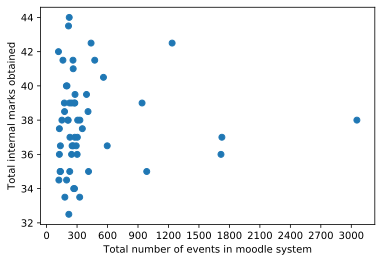

In [40]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.xlabel('Total number of events in moodle system')
plt.ylabel('Total internal marks obtained')
plt.xticks(np.arange(0, max(student_log['Total Event Count'])+1, 300.0))
plt.scatter(student_log['Total Event Count'], student_log['TOTAL(50)'])
#k-means, dv scan

## Working with CS data

In [41]:
cs_data = pd.read_csv('tabula_cs_intmarks.csv')

In [42]:
# Lowercasing the names
cs_data['Name'] = cs_data['Name'].str.lower()

In [43]:
#Converting the name format
cs_name = []
for i in range(0,41):
    name = cs_data['Name'].iloc[i].split()
    name = swap(name,0,1)
    name = " ".join(name)
    cs_name.append(name)

cs_name = np.array(cs_name)

In [44]:
cs_data['Name']= cs_name

In [45]:
cs_data.head()

,Name,INT1(20),LQ(10),MCQ(10),Total(20),Best of Internal I and II (20),Assign (10),PAPER(10),PROJECT(10),TOTAL(50)
0,bipin acharya,10.0,6,8.5,14.5,14.5,7,7,7,35.5
1,nirmal bhandari,10.5,8,8.5,16.5,16.5,6,6,6,34.5
2,roshan bhandari,11.0,8,6.5,14.5,14.5,8,7,7,36.5
3,yogesh bhandari,12.0,8,9.5,17.5,17.5,8,7,7,39.5
4,sachin byanju,10.0,8,8.5,16.5,16.5,9,9,9,43.5


In [46]:
for i in [11,14,28,31,38]:
    mistake = cs_data['Name'].iloc[i].split()
    cs_data['Name'].iloc[i] = " ".join(swap(mistake,1,2))

In [47]:
cs_log = pd.DataFrame()
for i in cs_data['Name']:
    names = work_data.loc[work_data['User Name'] == i]
    cs_log = cs_log.append(names)

In [48]:
cs_log = cs_log.reset_index(drop = True)

In [49]:
cs_log = cs_log.join(cs_data['TOTAL(50)'])

In [50]:
cs_log.head

<bound method NDFrame.head of                User Name  Total Event Count  TOTAL(50)
0          bipin acharya                252       35.5
1        nirmal bhandari                318       34.5
2        roshan bhandari                431       36.5
3        yogesh bhandari                404       39.5
4          sachin byanju                184       43.5
5          sanskar chand                175       38.5
6           nilima dahal                241       40.5
7           pranit dahal                162       43.0
8           sharad duwal                365       39.5
9          rochak gautam                220       32.0
10        sandeep gautam                267       33.0
11    murari kumar gupta                214       31.0
12           subash hada                202       35.5
13          ganesh karki               1574       37.0
14  brajesh raj kayastha                255       34.5
15        sudip maharjan                296       37.5
16        amir manandhar           

## Plot for both CS

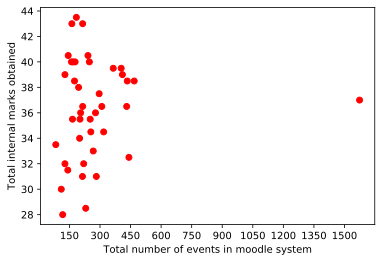

In [51]:
%matplotlib inline

plt.xlabel('Total number of events in moodle system')
plt.ylabel('Total internal marks obtained')
plt.xticks(np.arange(0, max(cs_log['Total Event Count'])+1, 150.0))
plt.plot(cs_log['Total Event Count'], cs_log['TOTAL(50)'],'ro', label = 'CS')

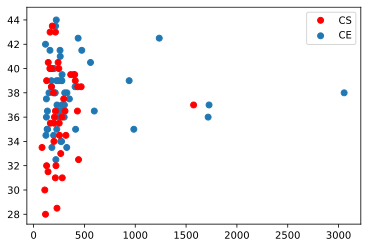

In [52]:
plt.plot(cs_log['Total Event Count'], cs_log['TOTAL(50)'],'ro', label = 'CS')
plt.scatter(student_log['Total Event Count'], student_log['TOTAL(50)'], label = 'CE')
plt.legend()

## We can get following information from this visualization
i. Student scoring the highest marks tend to have event count in the range of 200 in both CE and CS 

ii. CS student have lower marks (marks starts from 28) compared to CE students (marks start from 32)

iii. Student with lowest marks tends to have low event count

In [53]:
student_log.head()

,User Name,Total Event Count,TOTAL(50)
0,shailesh,393,39.5
1,yachana aryal,117,42.0
2,akriti bagale,328,38.0
3,junth basnet,986,35.0
4,pragya bhandari,161,41.5


In [54]:
cs_ce_log = student_log.append(cs_log)
cs_ce_log = cs_ce_log.reset_index(drop = True)
cs_ce_log

,User Name,Total Event Count,TOTAL(50)
0,shailesh,393,39.5
1,yachana aryal,117,42.0
2,akriti bagale,328,38.0
3,junth basnet,986,35.0
4,pragya bhandari,161,41.5
...,...,...,...
91,rujwol shrestha,195,38.0
92,suresh thapa,117,28.0
93,mala deep upadhaya,215,43.0
94,hemant dhakal,128,32.0


In [55]:
zeroto300 = 0
three00to600 = 0
six00to900 = 0
nine00to1200 = 0
above1200 = 0
for i in cs_ce_log['Total Event Count']:
    if i in range(0,300):
        zeroto300 += 1
    elif i in range(300,600):
        three00to600 += 1
    elif i in range(600,900):
        six00to900 += 1
    elif i in range(900,1200):
        nine00to1200 += 1
    else:
        above1200 += 1

In [56]:
print(zeroto300)
print(three00to600)
print(six00to900)
print(nine00to1200)
print(above1200)

67
22
0
2
5


## Making bar graphs

In [57]:
ranges = ['0-300', '300-600', '600-900', '900-1200', 'above 1200']
events = [zeroto300, three00to600, six00to900, nine00to1200, above1200]

<BarContainer object of 5 artists>

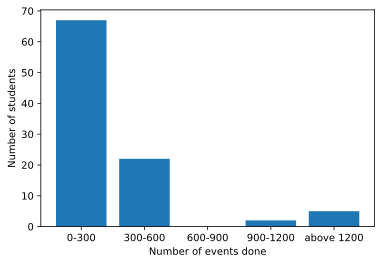

In [58]:
plt.ylabel('Number of students')
plt.xlabel('Number of events done')
plt.bar(ranges,events)

In [59]:
inactive = cs_ce_log.loc[cs_ce_log['Total Event Count'] < 200]

In [61]:
inactive.shape

(29, 3)

In [62]:
inactive

,User Name,Total Event Count,TOTAL(50)
1,yachana aryal,117,42.0
4,pragya bhandari,161,41.5
11,sumit chaudhary,175,39.0
12,kaushal dhakal,136,36.5
21,prakash khatri,177,38.5
23,sachin maharjan,195,40.0
28,sudip prasad neupane,137,35.0
30,aabha paudel,126,37.5
31,ravi -a prajapati,151,38.0
35,abhay raut,133,35.0


In [63]:
active = cs_ce_log.loc[cs_ce_log['Total Event Count'] >= 200]

In [64]:
active.shape

(67, 3)

In [65]:
active

,User Name,Total Event Count,TOTAL(50)
0,shailesh,393,39.5
2,akriti bagale,328,38.0
3,junth basnet,986,35.0
5,bisheshwor bhatta,940,39.0
6,shantanu bhattarai,230,37.0
...,...,...,...
87,julesh shrestha,200,34.0
89,pratap shrestha,205,36.0
90,rabina shrestha,442,32.5
93,mala deep upadhaya,215,43.0


As we can see, most of the students have number of events done in the range of 0-300. 

## Visualizing time data

In [66]:
log_time = []
for i in df['Time']:
    time = i.split()
    time = time[1]
    log_time.append(time)

In [67]:
alltimes = []
for i in log_time:
    event_time = t.datetime.strptime(i, '%H:%M')
    event_time = event_time.time()
    alltimes.append(event_time)

alltimes = np.array(alltimes)

In [68]:
len(alltimes)

54087

In [69]:
twelveto3am = 0
threeto6am = 0
sixto9am = 0
nineto12pm = 0
twelveto3pm = 0
threeto6pm = 0
sixto9pm = 0
nineto12am = 0

for i in alltimes:
    if t.time(0,0) <= i <= t.time(3,0):
        twelveto3am += 1
    elif t.time(3,0) <= i <= t.time(6,0):
        threeto6am += 1
    elif t.time(6,0) <= i <= t.time(9,0):
        sixto9am += 1
    elif t.time(9,0) <= i <= t.time(12,0):
        nineto12pm += 1
    elif t.time(12,0) <= i <= t.time(15,0):
        twelveto3pm += 1
    elif t.time(15,0) <= i <= t.time(18,0):
        threeto6pm += 1
    elif t.time(18,0) <= i <= t.time(21,0):
        sixto9pm += 1
    else:
        nineto12am += 1

In [70]:
print(twelveto3am)
print(threeto6am)
print(sixto9am)
print(nineto12pm)
print(twelveto3pm)
print(threeto6pm)
print(sixto9pm)
print(nineto12am)

2720
1032
4670
4085
6822
9772
16652
8334


In [71]:
time_ranges = ['12-3am','3-6am','6-9am','9-12pm','12-3pm','3-6pm','6-9pm','9-12am']
time_count = [twelveto3am, threeto6am, sixto9am, nineto12pm, twelveto3pm, threeto6pm, sixto9pm, nineto12am]

<BarContainer object of 8 artists>

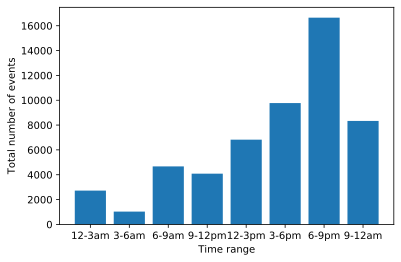

In [72]:
plt.ylabel('Total number of events')
plt.xlabel('Time range')
plt.bar(time_ranges,time_count)

As we can see, moodle system is mostly used from 6pm to 9pm. And used less after midnight. 

In [73]:
len(df['Component'].unique())

22

In [74]:
components = df['Component'].unique()

In [75]:
components

array(['Logs', 'System', 'File', 'Forum', 'Quiz', 'Level up!', 'URL',
       'User report', 'Chat', 'Assignment', 'Grader report',
       'Recycle bin', 'Page', 'File submissions', 'Performance Tracker ',
       'Wiki', 'Statistics', 'Live logs', 'Activity report',
       'Outcomes report', 'Overview report', 'Course participation'],
      dtype=object)

## Possible things that can be done in this data
1. Predicting marks by count of different events done by the student. 
2. Classification active, inactive students based on  the event count in moodle.
3. Determining in which time students are active in moodle

In [76]:
#info_gain  chaisquare error
#discriminant rule
#association rule
#

# K -Mean Clustering

CE students

In [77]:
student_log.head()

,User Name,Total Event Count,TOTAL(50)
0,shailesh,393,39.5
1,yachana aryal,117,42.0
2,akriti bagale,328,38.0
3,junth basnet,986,35.0
4,pragya bhandari,161,41.5


In [78]:
CE = student_log.iloc[:,[1,2]].values
CE

array([[ 393. ,   39.5],
       [ 117. ,   42. ],
       [ 328. ,   38. ],
       [ 986. ,   35. ],
       [ 161. ,   41.5],
       [ 940. ,   39. ],
       [ 230. ,   37. ],
       [ 262. ,   36.5],
       [ 474. ,   41.5],
       [ 278. ,   39. ],
       [ 246. ,   36. ],
       [ 175. ,   39. ],
       [ 136. ,   36.5],
       [ 413. ,   35. ],
       [ 292. ,   36.5],
       [ 251. ,   36.5],
       [ 280. ,   39.5],
       [ 408. ,   38.5],
       [ 228. ,   35. ],
       [ 223. ,   44. ],
       [ 274. ,   39. ],
       [ 177. ,   38.5],
       [1236. ,   42.5],
       [ 195. ,   40. ],
       [3055. ,   38. ],
       [ 275. ,   34. ],
       [ 306. ,   38. ],
       [ 248. ,   39. ],
       [ 137. ,   35. ],
       [ 201. ,   40. ],
       [ 126. ,   37.5],
       [ 151. ,   38. ],
       [ 210. ,   38. ],
       [ 597. ,   36.5],
       [ 216. ,   43.5],
       [ 133. ,   35. ],
       [ 262. ,   41. ],
       [1726. ,   37. ],
       [1717. ,   36. ],
       [ 260. ,   41.5],


In [79]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(CE)
    wcss.append(kmeans.inertia_)

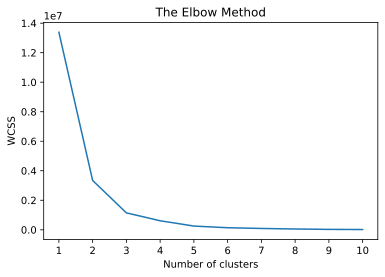

In [80]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.show()

From elbow method, 3 clusters is suitable for the data

Applying k-means to the student log dataset

In [81]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter= 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(CE)

In [82]:
y_kmeans

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [83]:
unique, counts = np.unique(y_kmeans, return_counts = True)
dict(zip(unique,counts))

{0: 49, 1: 5, 2: 1}

Visualizing the clusters

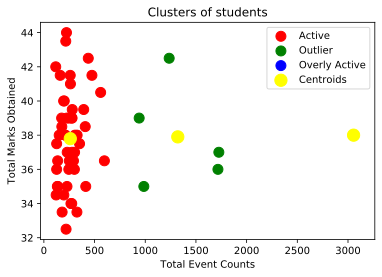

In [84]:
plt.scatter(CE[y_kmeans == 0, 0], CE[y_kmeans == 0 ,1], s = 100, c = 'red', label = 'Active')
plt.scatter(CE[y_kmeans == 1, 0], CE[y_kmeans == 1 ,1], s = 100, c = 'green', label = 'Outlier')
plt.scatter(CE[y_kmeans == 2, 0], CE[y_kmeans == 2 ,1], s = 100, c = 'blue', label = 'Overly Active')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 150, c = 'yellow', label = 'Centroids')
#plt.xticks(np.arange(0, max(student_log['Total Event Count'])+1, 300.0))
plt.title('Clusters of students')
plt.xlabel('Total Event Counts') 
plt.ylabel('Total Marks Obtained')
plt.legend()
plt.show()

CS students

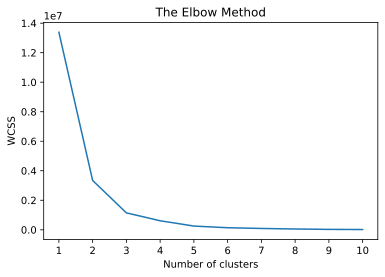

In [85]:
CS = cs_log.iloc[:,[1,2]].values
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss_cs = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(CE)
    wcss_cs.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.show()

In [86]:
kmeans_cs = KMeans(n_clusters = 3, init = 'k-means++', max_iter= 300, n_init = 10, random_state = 0)
y_kmeans_cs= kmeans_cs.fit_predict(CS)
unique, counts = np.unique(y_kmeans_cs, return_counts = True)
dict(zip(unique,counts))

{0: 30, 1: 1, 2: 10}

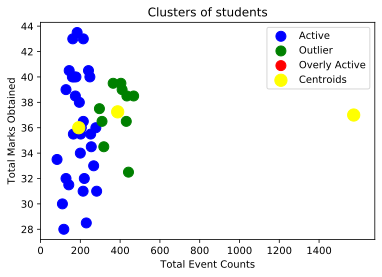

In [87]:
plt.scatter(CS[y_kmeans_cs == 0, 0], CS[y_kmeans_cs == 0 ,1], s = 100, c = 'blue', label = 'Active')
plt.scatter(CS[y_kmeans_cs == 2, 0], CS[y_kmeans_cs == 2 ,1], s = 100, c = 'green', label = 'Outlier')
plt.scatter(CS[y_kmeans_cs == 1, 0], CS[y_kmeans_cs == 1 ,1], s = 100, c = 'red', label = 'Overly Active')
plt.scatter(kmeans_cs.cluster_centers_[:,0], kmeans_cs.cluster_centers_[:,1], s = 150, c = 'yellow', label = 'Centroids')
plt.xticks(np.arange(0, max(cs_log['Total Event Count'])+1, 200.0))
plt.title('Clusters of students')
plt.xlabel('Total Event Counts') 
plt.ylabel('Total Marks Obtained')
plt.legend()
plt.show()

In [88]:
data = pd.read_csv('mrdm/Single_table.csv')

In [89]:
data

,id,first_name,last_name,Quiz Time,Quiz Score,Best of two,Assignment,Paper,Project,Total,Clicks on System,Clicks on file,Clicks on Quiz,Clicks on URL,Class
0,1,Bipin,Acharya,48,8.5,14.5,7,7,7.0,35.5,69,29,91,47,Active
1,2,Shailesh,Adhikari,71,8.5,16.5,8,8,7.0,39.5,72,41,160,94,Active
2,3,Yachana,Aryal,73,10.0,18.0,9,8,7.0,42.0,19,16,70,7,Active
3,4,Akriti,Bagale,81,8.0,14.0,9,8,7.0,38.0,78,66,153,20,Active
4,5,Junth,Basnet,74,8.0,15.0,6,6,8.0,35.0,161,286,73,439,Very Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,Ruchi,Tandukar,54,6.0,13.0,8,8,7.0,36.0,78,64,82,41,Active
92,93,Suresh,Thapa,100,0.0,11.0,6,6,5.0,28.0,28,32,8,26,Active
93,94,Milan,Thapa,63,9.5,15.5,6,6,7.0,34.5,29,48,92,12,Active
94,95,Mala Deep,Upadhaya,54,8.0,16.0,9,9,9.0,43.0,69,40,44,33,Active


In [9]:
total_clicks = []
for i in range(0,96):
    total = data['Clicks on System'][i]+data['Clicks on file'][i]+data['Clicks on Quiz'][i]+data['Clicks on URL'][i]
    total_clicks.append(total)

In [13]:
data['Total Clicks'] = total_clicks

In [14]:
data

,id,first_name,last_name,Quiz Time,Quiz Score,Best of two,Assignment,Paper,Project,Total,Clicks on System,Clicks on file,Clicks on Quiz,Clicks on URL,Class,Total Clicks
0,1,Bipin,Acharya,48,8.5,14.5,7,7,7.0,35.5,69,29,91,47,Active,236
1,2,Shailesh,Adhikari,71,8.5,16.5,8,8,7.0,39.5,72,41,160,94,Active,367
2,3,Yachana,Aryal,73,10.0,18.0,9,8,7.0,42.0,19,16,70,7,Active,112
3,4,Akriti,Bagale,81,8.0,14.0,9,8,7.0,38.0,78,66,153,20,Active,317
4,5,Junth,Basnet,74,8.0,15.0,6,6,8.0,35.0,161,286,73,439,Very Active,959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,Ruchi,Tandukar,54,6.0,13.0,8,8,7.0,36.0,78,64,82,41,Active,265
92,93,Suresh,Thapa,100,0.0,11.0,6,6,5.0,28.0,28,32,8,26,Active,94
93,94,Milan,Thapa,63,9.5,15.5,6,6,7.0,34.5,29,48,92,12,Active,181
94,95,Mala Deep,Upadhaya,54,8.0,16.0,9,9,9.0,43.0,69,40,44,33,Active,186


In [15]:
pairs = data.iloc[:,[15,9]].values

In [16]:
pairs

array([[ 236. ,   35.5],
       [ 367. ,   39.5],
       [ 112. ,   42. ],
       [ 317. ,   38. ],
       [ 959. ,   35. ],
       [ 145. ,   41.5],
       [ 381. ,   34.5],
       [ 392. ,   36.5],
       [ 312. ,   39.5],
       [ 914. ,   39. ],
       [ 222. ,   37. ],
       [ 253. ,   36.5],
       [ 448. ,   41.5],
       [ 155. ,   43.5],
       [ 165. ,   38.5],
       [ 164. ,   36. ],
       [ 225. ,   39. ],
       [ 265. ,   39. ],
       [ 154. ,   43. ],
       [ 215. ,   40.5],
       [ 102. ,   32. ],
       [ 124. ,   36.5],
       [ 251. ,   34. ],
       [ 399. ,   39.5],
       [ 339. ,   35. ],
       [ 254. ,   33. ],
       [ 279. ,   32. ],
       [ 210. ,   36.5],
       [ 243. ,   36.5],
       [ 251. ,   39.5],
       [ 195. ,   31. ],
       [ 177. ,   35.5],
       [ 401. ,   38.5],
       [ 200. ,   35. ],
       [ 204. ,   44. ],
       [1531. ,   37. ],
       [ 243. ,   34.5],
       [ 268. ,   39. ],
       [ 168. ,   38.5],
       [1109. ,   42.5],


In [17]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(pairs)
    wcss.append(kmeans.inertia_)

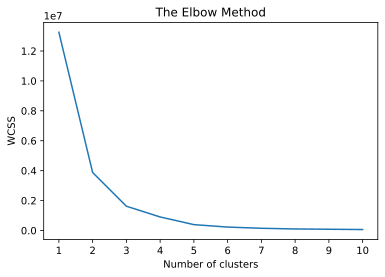

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter= 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(pairs)

In [21]:
y_kmeans

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
unique, counts = np.unique(y_kmeans, return_counts = True)
dict(zip(unique,counts))

{0: 90, 1: 5, 2: 1}

In [ ]:
plt.scatter(pairs[y_kmeans == 0, 0], pairs[y_kmeans == 0 ,1], s = 100, c = 'red', label = 'Active')
plt.scatter(pairs[y_kmeans == 1, 0], pairs[y_kmeans == 1 ,1], s = 100, c = 'green', label = 'Very Active')
plt.scatter(pairs[y_kmeans == 2, 0], pairs[y_kmeans == 2 ,1], s = 100, c = 'blue', label = 'Overly Active')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 150, c = 'yellow', label = 'Centroids')
#plt.xticks(np.arange(0, max(student_log['Total Event Count'])+1, 300.0))
plt.title('Clusters of students')
plt.xlabel('Total Event Counts') 
plt.ylabel('Total Marks Obtained')
plt.legend()
plt.show()

K- means clustering algorithm has been used to identify different clusters in the dataset. A scatter plot of Total Event Counts v/s tTotal Marks Obtained has been made and the clusters of different types of students has been inferenced. To find a suitable number of cluster for the dataset, we have used the Elbow method which helps in  finding a suitable number of clusters that doesn't overfits the dataset. So, the suitable number of clusters is 3 in  this case.

After visualizing the clusters in  the scatter plot, the clusters were studied and labelled. The first cluster is classified as Active group of students, who use the Moodle System at a range of 100 - 600 event counts (in case of CE students) and 50-300 event counts (in case of CS students). The Active group tend to score descent marks including the highest marks except for some exception where the score is quite low (below 32). The second cluster is classified as Overly Active group of students, who use the Moodle System at a range of 900 - 18000 event counts (in case of CE students) and 300 - 600 event counts (in case of CS students). The Overly Active group tend to score descent marks but doesn't tend to score higher marks as per the intuition. The final cluster is categorized as Outlier group consisting of an individual student in  each CE and CS group who tend to have abnormally high event counts in the Moodlel System and also doesn't score high marks as per intuition. 

# Association rule learning

Finding relation between first internal marks and second internal marks

In [87]:
cs_ce_log.head()

,User Name,Total Event Count,TOTAL(50)
0,shailesh,393,39.5
1,yachana aryal,117,42.0
2,akriti bagale,328,38.0
3,junth basnet,986,35.0
4,pragya bhandari,161,41.5


In [88]:
ce_marks = student_data.iloc[:,[1,4]]

In [89]:
ce_marks.head()

,INT1(20),Total(20)
0,13.0,16.5
1,11.0,18.0
2,13.5,14.0
3,15.0,14.0
4,14.0,17.5


In [90]:
cs_marks = cs_data.iloc[:,[1,4]]

In [91]:
cs_marks.head()

,INT1(20),Total(20)
0,10.0,14.5
1,10.5,16.5
2,11.0,14.5
3,12.0,17.5
4,10.0,16.5


In [92]:
total_marks = ce_marks.append(cs_marks)

In [93]:
total_marks = total_marks.reset_index(drop = True)

In [94]:
total_marks

,INT1(20),Total(20)
0,13.0,16.5
1,11.0,18.0
2,13.5,14.0
3,15.0,14.0
4,14.0,17.5
...,...,...
91,9.5,16.0
92,11.0,NaN
93,16.0,16.0
94,9.5,12.0


In [95]:
unique = (total_marks['INT1(20)'].append(total_marks['Total(20)'])).unique()
unique

array([13. , 11. , 13.5, 15. , 14. , 12. , 10. , 11.5, 10.5,  8. ,  4. ,
       12.5,  9. ,  9.5,  7. ,  2.5, 16. , 16.5, 18. , 17.5, 15.5, 14.5,
       18.5, 17. ,  nan])

In [96]:
total_marks.groupby('Total(20)').count()

,INT1(20)
Total(20),
10.0,1
11.0,1
11.5,2
12.0,3
12.5,1
13.0,1
13.5,4
14.0,9
14.5,8


In [97]:
cs_ce_log.head()

,User Name,Total Event Count,TOTAL(50)
0,shailesh,393,39.5
1,yachana aryal,117,42.0
2,akriti bagale,328,38.0
3,junth basnet,986,35.0
4,pragya bhandari,161,41.5


In [98]:
cs_ce_log = cs_ce_log.join(total_marks)

In [99]:
cols = cs_ce_log.columns.tolist()
cols = ['User Name', 'INT1(20)', 'Total(20)', 'TOTAL(50)','Total Event Count']
cs_ce_log = cs_ce_log[cols]

In [100]:
cs_ce_log.head()

,User Name,INT1(20),Total(20),TOTAL(50),Total Event Count
0,shailesh,13.0,16.5,39.5,393
1,yachana aryal,11.0,18.0,42.0,117
2,akriti bagale,13.5,14.0,38.0,328
3,junth basnet,15.0,14.0,35.0,986
4,pragya bhandari,14.0,17.5,41.5,161


In [101]:
marks = []
for i in range(0,95):
    marks.append([(cs_ce_log.values[i,j]) for j in range(1,3)])

In [102]:
from apyori import apriori

In [103]:
1/95

0.010526315789473684

In [104]:
rules = apriori(marks, min_support = 0.01, min_confidence = 0.2, min_lift = 3, min_length = 2)

Visualising the results

In [105]:
results = list(rules)

In [106]:
print(len(results))

11


In [107]:
for item in results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " , items[0] , " -> " , items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule:  nan  ->  11.0
Support: 0.010526315789473684
Confidence: 1.0
Lift: 9.5
Rule:  nan  ->  10.5
Support: 0.010526315789473684
Confidence: 1.0
Lift: 23.75
Rule:  2.5  ->  11.5
Support: 0.010526315789473684
Confidence: 1.0
Lift: 7.3076923076923075
Rule:  4.0  ->  14.5
Support: 0.010526315789473684
Confidence: 1.0
Lift: 11.875
Rule:  14.5  ->  7.0
Support: 0.010526315789473684
Confidence: 1.0
Lift: 11.875
Rule:  8.0  ->  15.5
Support: 0.010526315789473684
Confidence: 0.2
Lift: 3.8000000000000003
Rule:  9.0  ->  14.0
Support: 0.010526315789473684
Confidence: 1.0
Lift: 5.588235294117647
Rule:  16.5  ->  10.5
Support: 0.021052631578947368
Confidence: 0.5
Lift: 3.166666666666667
Rule:  18.5  ->  12.0
Support: 0.021052631578947368
Confidence: 0.6666666666666666
Lift: 3.725490196078431
Rule:  16.5  ->  13.0
Support: 0.05263157894736842
Confidence: 0.625
Lift: 3.9583333333333335
Rule:  18.5  ->  13.0
Support: 0.010526315789473684
Confidence: 0.3333333333333333
Lift: 3.958333333333333


The result shows the association between two marks of the two internals. For example, if students scores 13.0 in the first internal then they will most likely score 16.5 or 18.5 in the second internal and viceversa.

# Deep Learning

## Artificial Neural Network

Tried to predict the internal mark scores by tracking the counts of each component used by the students.
But deep learning couldn't be implemented in the dataset. Used Artificial Neural Network with relu activation in the hidden layers, and linear activation in the outpur layer. Even after 3000 epochs, got an accuracy of 25%, meaning it is not feasible to predict internal marks from event counts of the students. 

In [108]:
components = df['Component'].unique()
len(components)

22

In [109]:
event_log = pd.DataFrame(columns = components)

In [110]:
event_log

,Logs,System,File,Forum,Quiz,Level up!,URL,User report,Chat,Assignment,...,Page,File submissions,Performance Tracker,Wiki,Statistics,Live logs,Activity report,Outcomes report,Overview report,Course participation


In [111]:
event_log = cs_ce_log.join(event_log)

In [112]:
usernames = event_log['User Name']
usernames = np.array(usernames)
usernames = np.where(usernames == "shailesh","shailesh ??",usernames)

In [113]:
event_log['User Name'] = usernames

In [114]:
for i in components:
    for j in  usernames:
        count = df.loc[(df['User full name'].str.lower() == j) & (df['Component'] == i)]
        event_log[i].loc[event_log['User Name'] == j] = len(count)

C:\Users\Prashanna\Anaconda3\envs\tf\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [115]:
event_data = event_log

In [116]:
event_data

,User Name,INT1(20),Total(20),TOTAL(50),Total Event Count,Logs,System,File,Forum,Quiz,...,Page,File submissions,Performance Tracker,Wiki,Statistics,Live logs,Activity report,Outcomes report,Overview report,Course participation
0,shailesh ??,13.0,16.5,39.5,393,0,72,41,13,160,...,0,0,0,0,0,0,0,0,0,0
1,yachana aryal,11.0,18.0,42.0,117,0,19,16,0,70,...,0,0,0,0,0,0,0,0,0,0
2,akriti bagale,13.5,14.0,38.0,328,0,78,66,4,153,...,0,0,0,0,0,0,0,0,0,0
3,junth basnet,15.0,14.0,35.0,986,0,161,286,9,73,...,0,0,0,0,0,0,0,0,0,0
4,pragya bhandari,14.0,17.5,41.5,161,0,45,37,7,49,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,rujwol shrestha,9.5,16.0,38.0,195,0,29,19,4,137,...,0,0,0,0,0,0,0,0,0,0
92,suresh thapa,11.0,NaN,28.0,117,0,28,32,14,8,...,0,0,0,0,0,0,0,0,0,0
93,mala deep upadhaya,16.0,16.0,43.0,215,0,69,40,19,44,...,0,0,0,0,0,0,0,0,0,0
94,hemant dhakal,9.5,12.0,32.0,128,0,35,24,12,41,...,0,2,0,0,0,0,0,0,0,0


In [117]:
for i in components:
    count = event_data.loc[event_data[i] == 0]
    print(i, '->', len(count))

Logs -> 96
System -> 0
File -> 0
Forum -> 6
Quiz -> 0
Level up! -> 0
URL -> 3
User report -> 67
Chat -> 26
Assignment -> 26
Grader report -> 96
Recycle bin -> 96
Page -> 96
File submissions -> 88
Performance Tracker  -> 96
Wiki -> 96
Statistics -> 96
Live logs -> 96
Activity report -> 96
Outcomes report -> 96
Overview report -> 96
Course participation -> 96


Since these components are not used by students (all values is zero) so we can drop it:::

Logs,
Grader Report,
Recycle bin ,
Page,
Performance Tracker,
Wiki,
Statistics,
Live logs,
Activity Report,
Outcomes report,
Overview report,
Course participation

In [118]:
event_data = event_data.iloc[:,[0,3,6,7,8,9,10,11,12,13,14,18]]

So we will be looking only at 10 components and track the users performance

In [119]:
event_data['User Name'] = cs_ce_log['User Name']

C:\Users\Prashanna\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
event_data

,User Name,TOTAL(50),System,File,Forum,Quiz,Level up!,URL,User report,Chat,Assignment,File submissions
0,shailesh,39.5,72,41,13,160,6,94,0,4,3,0
1,yachana aryal,42.0,19,16,0,70,3,7,0,0,2,0
2,akriti bagale,38.0,78,66,4,153,6,20,0,0,1,0
3,junth basnet,35.0,161,286,9,73,8,439,0,2,8,0
4,pragya bhandari,41.5,45,37,7,49,5,14,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,rujwol shrestha,38.0,29,19,4,137,3,1,1,0,1,0
92,suresh thapa,28.0,28,32,14,8,3,26,1,3,2,0
93,mala deep upadhaya,43.0,69,40,19,44,6,33,0,3,1,0
94,hemant dhakal,32.0,35,24,12,41,4,2,1,1,6,2


In [121]:
#import keras

In [122]:
#X = event_data.iloc[:,2:].values
#y = event_data.iloc[:,1].values

In [123]:
#Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0)

In [124]:
#Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [125]:
#from keras.models import Sequential
#from keras.layers import Dense

In [126]:
#Initialising ANN
#predictor = Sequential()

In [127]:
#Adding the input layer and the first hidden layer
#predictor.add(Dense(units = 6,kernel_initializer = 'uniform',activation = 'relu',input_dim =10))

In [128]:
#Adding the second hidden layer
#predictor.add(Dense(units = 5,kernel_initializer = 'uniform',activation = 'relu'))
#predictor.add(Dense(units = 6,kernel_initializer = 'uniform',activation = 'relu'))
#predictor.add(Dense(units = 6,kernel_initializer = 'uniform',activation = 'relu'))

In [129]:
#Adding the output layer
#predictor.add(Dense(units = 1,kernel_initializer = 'uniform',activation = 'linear'))

In [130]:
#Compiling the ANN
#predictor.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['accuracy'])

In [131]:
#Fitting the ANN to the Training Set
#predictor.fit(X_train, y_train, batch_size =1, epochs = 1000)

# Hypothesis testing

The null hypothesis is
    "There is no relation between Activeness and Marks of the students".
The alternate hypothesis is
    "There is relation between Activeness and Marks, the more student are active, the better marks they get".

In [120]:
student_log.head()

,User Name,Total Event Count,TOTAL(50),Event status,Marks status
0,shailesh,393,39.5,Active,Good
1,yachana aryal,117,42.0,Active,Excellent
2,akriti bagale,328,38.0,Active,Good
3,junth basnet,986,35.0,Overly Active,Good
4,pragya bhandari,161,41.5,Active,Excellent


In [121]:
cs_log.head()

,User Name,Total Event Count,TOTAL(50),Event status,Marks status
0,bipin acharya,252,35.5,Active,Good
1,nirmal bhandari,318,34.5,Overly Active,Satisfactory
2,roshan bhandari,431,36.5,Overly Active,Good
3,yogesh bhandari,404,39.5,Overly Active,Good
4,sachin byanju,184,43.5,Active,Excellent


In [122]:
y_kmeans

array([0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [123]:
student_log['Event status'] = y_kmeans
student_log
student_log['Event status'].iloc[5]

2

In [124]:
event_status = []
for i in range(0,55):
    status = student_log['Event status'].iloc[i]
    if status == 0:
        status = 'Active'
    if status == 1:
        status = 'Outlier'
    if status == 2:
        status = 'Overly Active'
    event_status.append(status)

event_status = np.array(event_status)
student_log['Event status'] = event_status

In [125]:
mark_status = []
for i in range(0,55):
    marks = student_log['TOTAL(50)'].iloc[i]
    if marks >= 40:
        marks = 'Excellent'
    elif marks >= 35 and marks<40:
        marks = 'Good'
    elif marks >= 30 and marks<35:
        marks = 'Satisfactory'
    else:
        marks = 'Bad'
    mark_status.append(marks)

mark_status = np.array(mark_status)
student_log['Marks status'] = mark_status
student_log

,User Name,Total Event Count,TOTAL(50),Event status,Marks status
0,shailesh,393,39.5,Active,Good
1,yachana aryal,117,42.0,Active,Excellent
2,akriti bagale,328,38.0,Active,Good
3,junth basnet,986,35.0,Overly Active,Good
4,pragya bhandari,161,41.5,Active,Excellent
5,bisheshwor bhatta,940,39.0,Overly Active,Good
6,shantanu bhattarai,230,37.0,Active,Good
7,manish bhusal,262,36.5,Active,Good
8,bipin bohara,474,41.5,Active,Excellent
9,ekta chaudhary,278,39.0,Active,Good


In [126]:
y_kmeans_cs

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [127]:
cs_log['Event status'] = y_kmeans_cs
cs_log

,User Name,Total Event Count,TOTAL(50),Event status,Marks status
0,bipin acharya,252,35.5,1,Good
1,nirmal bhandari,318,34.5,0,Satisfactory
2,roshan bhandari,431,36.5,0,Good
3,yogesh bhandari,404,39.5,0,Good
4,sachin byanju,184,43.5,1,Excellent
5,sanskar chand,175,38.5,1,Good
6,nilima dahal,241,40.5,1,Excellent
7,pranit dahal,162,43.0,1,Excellent
8,sharad duwal,365,39.5,0,Good
9,rochak gautam,220,32.0,1,Satisfactory


In [128]:
event_status = []
for i in range(0,41):
    status = cs_log['Event status'].iloc[i]
    if status == 1:
        status = 'Active'
    if status == 0:
        status = 'Overly Active'
    if status == 2:
        status = 'Outlier'
    event_status.append(status)

event_status = np.array(event_status)
cs_log['Event status'] = event_status

In [129]:
mark_status = []
for i in range(0,41):
    marks = cs_log['TOTAL(50)'].iloc[i]
    if marks >= 40:
        marks = 'Excellent'
    elif marks >= 35 and marks<40:
        marks = 'Good'
    elif marks >= 30 and marks<35:
        marks = 'Satisfactory'
    else:
        marks = 'Bad'
    mark_status.append(marks)

mark_status = np.array(mark_status)
cs_log['Marks status'] = mark_status
cs_log

,User Name,Total Event Count,TOTAL(50),Event status,Marks status
0,bipin acharya,252,35.5,Active,Good
1,nirmal bhandari,318,34.5,Overly Active,Satisfactory
2,roshan bhandari,431,36.5,Overly Active,Good
3,yogesh bhandari,404,39.5,Overly Active,Good
4,sachin byanju,184,43.5,Active,Excellent
5,sanskar chand,175,38.5,Active,Good
6,nilima dahal,241,40.5,Active,Excellent
7,pranit dahal,162,43.0,Active,Excellent
8,sharad duwal,365,39.5,Overly Active,Good
9,rochak gautam,220,32.0,Active,Satisfactory


In [130]:
cs_ce_status = student_log.append(cs_log)
cs_ce_status = cs_ce_status.reset_index(drop = True)
cd_ce_status
cs_ce_status.head()

NameError: name 'cd_ce_status' is not defined

## Chi-square test to test the Hypothesis

In [143]:
contingency_table = pd.crosstab(cs_ce_status['Event status'],cs_ce_status['Marks status'])
contingency_table

Marks status,Bad,Excellent,Good,Satisfactory
Event status,,,,
Active,2,20,40,17
Outlier,0,0,2,0
Overly Active,0,1,12,2


In [144]:
#Observed values
observed_values = contingency_table.values
observed_values

array([[ 2, 20, 40, 17],
       [ 0,  0,  2,  0],
       [ 0,  1, 12,  2]], dtype=int64)

In [145]:
from scipy import stats
b = stats.chi2_contingency(contingency_table)
#b
expected_values = np.around(b[3],decimals = 1)
expected_values

array([[ 1.6, 17.3, 44.4, 15.6],
       [ 0. ,  0.4,  1.1,  0.4],
       [ 0.3,  3.3,  8.4,  3. ]])

In [146]:
no_of_rows = len(contingency_table.iloc[0:3,0])
no_of_columns = len(contingency_table.iloc[0,0:4])
ddof = (no_of_rows -1)*(no_of_columns-1)
ddof

6

In [152]:
from scipy.stats import chi2
chi_square = sum([(o-e)**2/e for o,e in zip(observed_values,expected_values)])
chi_square_statistic = chi_square[0] + chi_square[1] + chi_square[2] + chi_square[3]
print("Sum of ", chi_square , " => ", chi_square_statisics)

Sum of  [       nan 2.42441759 2.71525682 0.85897436]  => 6.3405


C:\Users\Prashanna\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [152]:
critical_value = chi2.ppf(q = 1-alpha, df = ddof) #ddof means degree of freedom
critical_value

12.591587243743977

In [153]:
# p-value
p_value = 1 - chi2.cdf(x = chi_square_statistic, df = ddof)
p_value

0.3861462193938662

In [154]:
print('Significance level: ', alpha)
print('Degree of freedom: ', ddof)
print('chi-square statistic: ', chi_square_statistic)
print('critical_value: ', critical_value)
print('p-value: ',p_value)

Significance level:  0.05
Degree of freedom:  6
chi-square statistic:  6.340509501602106
critical_value:  12.591587243743977
p-value:  0.3861462193938662


In [155]:
if chi_square_statistic >= critical_value:
    print("Reject null hypothesis. Conclude There is a relation between activeness and marks of the students")
else:
    print("Retain null hypothesis. Conclude There is no relation between activeness and marks of the students")

if p_value <= alpha:
    print("Reject null hypothesis. Conclude There is a relation between activeness and marks of the students")
else:
    print("Retain null hypothesis. Conclude There is no relation between activenss and marks of the students")

Retain null hypothesis. Conclude There is no relation between activeness and marks of the students
Retain null hypothesis. Conclude There is no relation between activenss and marks of the students


# Relational table for MRDM

In [180]:
Students = pd.DataFrame()

In [181]:
cs_ce_log['User Name'][0] = 'shailesh adhikari'

C:\Users\Prashanna\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [182]:
pd.set_option('display.max_rows',96)
cs_ce_log

,User Name,INT1(20),Total(20),TOTAL(50),Total Event Count
0,shailesh adhikari,13.0,16.5,39.5,393
1,yachana aryal,11.0,18.0,42.0,117
2,akriti bagale,13.5,14.0,38.0,328
3,junth basnet,15.0,14.0,35.0,986
4,pragya bhandari,14.0,17.5,41.5,161
5,bisheshwor bhatta,12.0,16.0,39.0,940
6,shantanu bhattarai,12.0,16.5,37.0,230
7,manish bhusal,10.0,17.5,36.5,262
8,bipin bohara,11.5,15.5,41.5,474
9,ekta chaudhary,12.0,15.0,39.0,278


In [183]:
first_name = []
last_name = []
for i in range(0,96):
    name = cs_ce_log['User Name'].iloc[i].split()
    first_name.append(name[0])
    last_name.append(name[1])
    
first_name = np.array(first_name)
last_name = np.array(last_name)

In [184]:
pd.set_option('display.max_rows',96)
Students['first_name'] = first_name
Students['last_name'] = last_name

Students['first_name'][18] = 'bhanu bhakta'
Students['last_name'][18] = 'joshi'
Students['first_name'][31]='ravi -a'
Students['first_name'][32]='ravi -b'
Students['last_name'][31]= 'prajapati'
Students['last_name'][32]='prajapati'
Students['first_name'][40]='divyasor makai'
Students['last_name'][40]='shrestha'
Students['first_name'][28]='sudip prasad'
Students['last_name'][28]='neupane'
Students['first_name'][44]='pritam suwal'
Students['last_name'][44]='shrestha'
Students['first_name'][45]='sagun lal'
Students['last_name'][45]='shrestha'
Students['first_name'][66]= "murari kumar"
Students['last_name'][66]='gupta'
Students['first_name'][69]='brajesh raj'
Students['last_name'][69]='kayastha'
Students['first_name'][83]='suraj kumar'
Students['last_name'][83]='sah'
Students['first_name'][86]='anil kumar'
Students['last_name'][86]='shrestha'
Students['first_name'][93]='mala deep'
Students['last_name'][93]='upadhaya'
Students

,first_name,last_name
0,shailesh,adhikari
1,yachana,aryal
2,akriti,bagale
3,junth,basnet
4,pragya,bhandari
5,bisheshwor,bhatta
6,shantanu,bhattarai
7,manish,bhusal
8,bipin,bohara
9,ekta,chaudhary


In [185]:
Students['Class']=cs_ce_status['Event status']

In [186]:
import string
First_name = []
Last_name = []
for i in range(0,96):
    f = Students['first_name'][i]
    l = Students['last_name'][i]
    f_capital = string.capwords(f)
    l_capital = string.capwords(l)
    First_name.append(f_capital)
    Last_name.append(l_capital)
    
First_name = np.array(First_name)
Last_name = np.array(Last_name)

Students['first_name'] = First_name
Students['last_name'] = Last_name
Students

,first_name,last_name,Class
0,Shailesh,Adhikari,Active
1,Yachana,Aryal,Active
2,Akriti,Bagale,Active
3,Junth,Basnet,Overly Active
4,Pragya,Bhandari,Active
5,Bisheshwor,Bhatta,Overly Active
6,Shantanu,Bhattarai,Active
7,Manish,Bhusal,Active
8,Bipin,Bohara,Active
9,Ekta,Chaudhary,Active


In [187]:
Students = Students.sort_values('last_name')
Students = Students.reset_index(drop = True)
Students.index += 1
Students

,first_name,last_name,Class
1,Bipin,Acharya,Active
2,Shailesh,Adhikari,Active
3,Yachana,Aryal,Active
4,Akriti,Bagale,Active
5,Junth,Basnet,Overly Active
6,Pragya,Bhandari,Active
7,Nirmal,Bhandari,Overly Active
8,Roshan,Bhandari,Overly Active
9,Yogesh,Bhandari,Overly Active
10,Bisheshwor,Bhatta,Overly Active


In [189]:
Students.to_csv(r'mrdm\Students.csv',index = range(1,97), header = True)

In [167]:
event_data['User Name'][0] = 'shailesh adhikari'

C:\Users\Prashanna\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Prashanna\Anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:3319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [168]:
event_data

,User Name,TOTAL(50),System,File,Forum,Quiz,Level up!,URL,User report,Chat,Assignment,File submissions
0,shailesh adhikari,39.5,72,41,13,160,6,94,0,4,3,0
1,yachana aryal,42.0,19,16,0,70,3,7,0,0,2,0
2,akriti bagale,38.0,78,66,4,153,6,20,0,0,1,0
3,junth basnet,35.0,161,286,9,73,8,439,0,2,8,0
4,pragya bhandari,41.5,45,37,7,49,5,14,0,4,0,0
5,bisheshwor bhatta,39.0,93,31,10,116,7,674,1,2,6,0
6,shantanu bhattarai,37.0,45,33,1,122,5,22,0,1,1,0
7,manish bhusal,36.5,44,40,2,143,4,26,0,2,1,0
8,bipin bohara,41.5,114,117,13,105,7,112,0,1,5,0
9,ekta chaudhary,39.0,52,58,5,151,5,4,0,1,2,0


In [169]:
Student_objects = pd.DataFrame()

In [170]:
User_name = []
for i in range(0,96):
    u = event_data['User Name'][i]
    u_capital = string.capwords(u)
    User_name.append(u_capital)
    
User_name = np.array(User_name)

event_data['User Name'] = User_name
event_data

C:\Users\Prashanna\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,User Name,TOTAL(50),System,File,Forum,Quiz,Level up!,URL,User report,Chat,Assignment,File submissions
0,Shailesh Adhikari,39.5,72,41,13,160,6,94,0,4,3,0
1,Yachana Aryal,42.0,19,16,0,70,3,7,0,0,2,0
2,Akriti Bagale,38.0,78,66,4,153,6,20,0,0,1,0
3,Junth Basnet,35.0,161,286,9,73,8,439,0,2,8,0
4,Pragya Bhandari,41.5,45,37,7,49,5,14,0,4,0,0
5,Bisheshwor Bhatta,39.0,93,31,10,116,7,674,1,2,6,0
6,Shantanu Bhattarai,37.0,45,33,1,122,5,22,0,1,1,0
7,Manish Bhusal,36.5,44,40,2,143,4,26,0,2,1,0
8,Bipin Bohara,41.5,114,117,13,105,7,112,0,1,5,0
9,Ekta Chaudhary,39.0,52,58,5,151,5,4,0,1,2,0


In [174]:
event_data.iloc[:,[0,2,3,5,7]]

,User Name,System,File,Quiz,URL
0,Shailesh Adhikari,72,41,160,94
1,Yachana Aryal,19,16,70,7
2,Akriti Bagale,78,66,153,20
3,Junth Basnet,161,286,73,439
4,Pragya Bhandari,45,37,49,14
5,Bisheshwor Bhatta,93,31,116,674
6,Shantanu Bhattarai,45,33,122,22
7,Manish Bhusal,44,40,143,26
8,Bipin Bohara,114,117,105,112
9,Ekta Chaudhary,52,58,151,4
